In [16]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

In [17]:
T = 5           # trial duration
h = 1 # true hazard rate in Hz
n = np.arange(int(h * T))
m = h # mode of prior
variance = [10, 5, 1]  # variance levels of prior
# Hyperparameters for Beta prior over h
# with mode = m Hz and variance 
beta = np.array([m / (2 * v) + np.sqrt(m**2 / (v**2) + 4 / v) / 2 for v in variance])  # 1 / scale parameter of gamma pdf
alpha = m * np.array(beta) + 1   # shape parameter of gamma pdf

In [18]:
def h_var(alpha, beta, n):
    return [(a + n) / ((b + n)**2) for a, b in zip(alpha, beta)]

Trial duration (sec) 5
True h (Hz) 1
prior mode 1


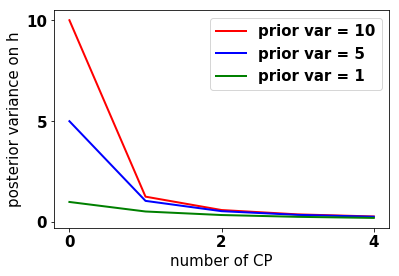

In [19]:
print('Trial duration (sec)', T)
print('True h (Hz)', h)
print('prior mode', m)
plt.figure()
lw = 2
Variance = h_var(alpha, beta, n) 
plt.plot(n, Variance[0], 'red', label='prior var = 10', linewidth = lw)    # prior Variance = 10
plt.plot(n, Variance[1], 'blue', label='prior var = 5', linewidth = lw)   # prior Variance = 5
plt.plot(n, Variance[2], 'green', label='prior var = 1',linewidth = lw)  # prior Variance = 1
ax = plt.gca()
ax.locator_params(nbins = 4, axis = 'x')
ax.locator_params(nbins = 3, axis = 'y')
plt.title('')
plt.ylabel('posterior variance on h')
plt.xlabel('number of CP')
plt.legend()
plt.show()